In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the datasets to be used (both training and testing)
training_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A 2023/players_21.csv')
data1 = training_data.copy()


# 1. Data Pre-processing and Feature extraction process

### Removing useless variables (Those with 30% missing values)



Removed columns containing URLs and players specific physical information since they do not affect the overall rating of the players but create an unexplained variance in the model, reducing the accuracy of the feature selection process

In [4]:
first_variables = training_data[['sofifa_id','overall', 'potential', 'age','weak_foot','skill_moves','international_reputation','work_rate','body_type']]
second_variables = training_data.loc[:, 'pace':'goalkeeping_speed']
training_data = pd.concat([first_variables,second_variables], axis=1)

Remove variables with more than 30% missing values (useless variables)

In [5]:
threshold = 0.30 *len(training_data)

In [6]:
training_data = training_data.dropna(thresh=threshold, axis =1)

#Exploratory Data Analysis(EDA)

Carrying out  exploratory data analysis (EDA) to better understand the data

In [7]:
#Viewing the first five element of the training data
training_data.head()

,sofifa_id,overall,potential,age,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,93,93,33,4,4,5,Medium/Low,Unique,85.0,...,75,96,32,35,24,6,11,15,14,8
1,20801,92,92,35,4,5,5,High/Low,Unique,89.0,...,84,95,28,32,24,7,11,15,14,11
2,188545,91,91,31,4,4,4,High/Medium,Unique,78.0,...,88,88,35,42,19,15,6,12,8,10
3,190871,91,91,28,5,5,5,High/Medium,Unique,91.0,...,92,93,35,30,29,9,9,15,15,11
4,192985,91,91,29,5,4,4,High/High,Unique,76.0,...,84,91,68,65,53,15,13,5,10,13


In [8]:
#Viewing the last five element of the training data
training_data.tail()

,sofifa_id,overall,potential,age,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
18939,257710,47,52,21,2,2,1,Low/Low,Normal (170-185),58.0,...,35,40,45,56,47,12,13,8,14,6
18940,257933,47,53,21,2,2,1,Low/Low,Lean (170-185),58.0,...,35,35,43,42,53,8,8,13,14,10
18941,257936,47,47,28,2,2,1,Low/Low,Lean (185+),65.0,...,36,35,38,43,45,8,5,11,5,7
18942,258736,47,67,17,2,2,1,Medium/Medium,Lean (170-185),70.0,...,50,45,18,11,13,11,13,9,9,6
18943,258760,47,67,17,2,2,1,Medium/Medium,Normal (170-185),64.0,...,36,38,32,44,40,12,10,9,6,8


In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    18944 non-null  int64  
 1   overall                      18944 non-null  int64  
 2   potential                    18944 non-null  int64  
 3   age                          18944 non-null  int64  
 4   weak_foot                    18944 non-null  int64  
 5   skill_moves                  18944 non-null  int64  
 6   international_reputation     18944 non-null  int64  
 7   work_rate                    18944 non-null  object 
 8   body_type                    18944 non-null  object 
 9   pace                         16861 non-null  float64
 10  shooting                     16861 non-null  float64
 11  passing                      16861 non-null  float64
 12  dribbling                    16861 non-null  float64
 13  defending       

In [10]:
training_data.nunique() #Checking for the number of duplications in the columns

sofifa_id                      18944
overall                           47
potential                         48
age                               29
weak_foot                          5
skill_moves                        5
international_reputation           5
work_rate                          9
body_type                         10
pace                              70
shooting                          77
passing                           68
dribbling                         69
defending                         77
physic                            63
attacking_crossing                89
attacking_finishing               93
attacking_heading_accuracy        89
attacking_short_passing           86
attacking_volleys                 88
skill_dribbling                   91
skill_curve                       91
skill_fk_accuracy                 90
skill_long_passing                86
skill_ball_control                91
movement_acceleration             85
movement_sprint_speed             84
m

In [11]:
training_data.isnull().sum() # Getting the number of missing values in each columns

sofifa_id                         0
overall                           0
potential                         0
age                               0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
body_type                         0
pace                           2083
shooting                       2083
passing                        2083
dribbling                      2083
defending                      2083
physic                         2083
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility            

In [12]:
((training_data.isnull().sum())/len(training_data))*100 # percentage of missing values in each column

sofifa_id                       0.000000
overall                         0.000000
potential                       0.000000
age                             0.000000
weak_foot                       0.000000
skill_moves                     0.000000
international_reputation        0.000000
work_rate                       0.000000
body_type                       0.000000
pace                           10.995566
shooting                       10.995566
passing                        10.995566
dribbling                      10.995566
defending                      10.995566
physic                         10.995566
attacking_crossing              0.000000
attacking_finishing             0.000000
attacking_heading_accuracy      0.000000
attacking_short_passing         0.000000
attacking_volleys               0.000000
skill_dribbling                 0.000000
skill_curve                     0.000000
skill_fk_accuracy               0.000000
skill_long_passing              0.000000
skill_ball_contr

In [13]:
training_data.describe(include='all').T #Understanding the statistical description of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sofifa_id,18944.0,NaN,NaN,NaN,226232.328917,27166.574284,41.0,210028.75,232301.5,246745.75,258970.0
overall,18944.0,NaN,NaN,NaN,65.677787,7.002278,47.0,61.0,66.0,70.0,93.0
potential,18944.0,NaN,NaN,NaN,71.086729,6.109985,47.0,67.0,71.0,75.0,95.0
age,18944.0,NaN,NaN,NaN,25.225823,4.697354,16.0,21.0,25.0,29.0,53.0
weak_foot,18944.0,NaN,NaN,NaN,2.936603,0.667132,1.0,3.0,3.0,3.0,5.0
skill_moves,18944.0,NaN,NaN,NaN,2.363017,0.766469,1.0,2.0,2.0,3.0,5.0
international_reputation,18944.0,NaN,NaN,NaN,1.09185,0.361841,1.0,1.0,1.0,1.0,5.0
work_rate,18944,9,Medium/Medium,9980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_type,18944,10,Normal (170-185),6521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pace,16861.0,NaN,NaN,NaN,67.66811,10.984862,25.0,62.0,68.0,75.0,96.0


In [14]:
training_data.dtypes   #viewing the data types of the columns

sofifa_id                        int64
overall                          int64
potential                        int64
age                              int64
weak_foot                        int64
skill_moves                      int64
international_reputation         int64
work_rate                       object
body_type                       object
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration    

### Understanding how strongly different variables (columns in the DataFrame) are related to each other.

In [15]:
correlation_matrix= training_data.corr()

<Axes: >

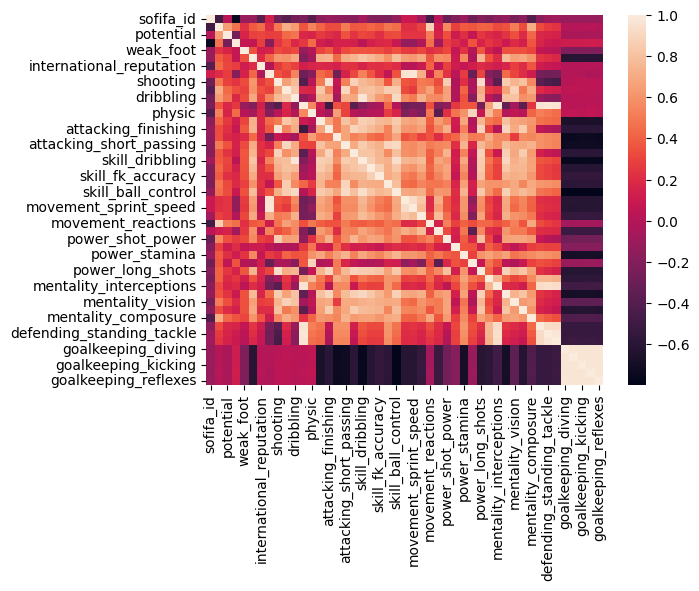

In [16]:
sns.heatmap(correlation_matrix)

<Axes: >

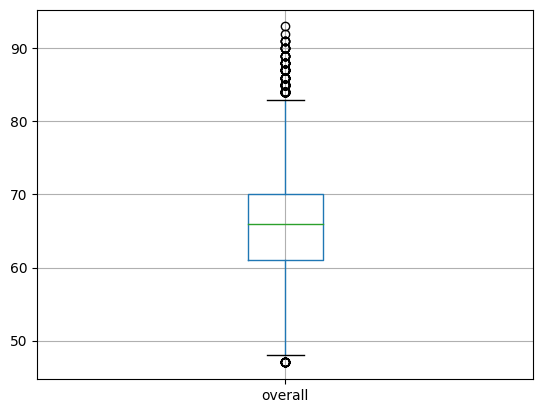

In [17]:
#Displays the summary of the set of data values of the overall column
training_data[['overall']].boxplot()

<Axes: xlabel='overall', ylabel='count'>

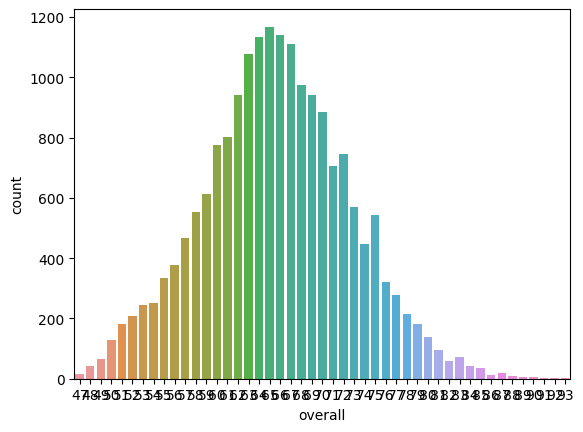

In [18]:
#Generating a plot that shows the frequency or count of each unique value in the 'overall' column
sns.countplot(x=training_data['overall'])

 Performing a t-test to assess whether there is a statistically significant difference between the 'overall' and 'potential' data in the training_data. The t-statistic of -80.11 indicates a substantial difference between the groups being compared. The p-value of 0.0 suggests that this difference is highly unlikely to have occurred by chance, leading to the rejection of the null hypothesis and indicating a significant difference between the groups.

In [19]:
from scipy.stats import ttest_ind

group_1 = training_data['overall']
group_2 = training_data['potential']

t_stat, p_value = ttest_ind(group_1, group_2)

print(f"t-statistic: {t_stat}")
rounded_p_value = round(p_value, 5)
print(f"P-value: {rounded_p_value}")

if rounded_p_value < 0.05:
    print("Reject the null hypothesis (significant difference between groups).")
else:
    print("Fail to reject the null hypothesis (no significant difference between groups).")


t-statistic: -80.10917765817972
P-value: 0.0
Reject the null hypothesis (significant difference between groups).


### Splitting numerical and categorical variables

In [20]:
y = training_data['overall']
training_data.drop('overall', axis=1,inplace=True)

Separating the numerical and categorical variables

In [21]:
numerical_columns = training_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = training_data.select_dtypes(include=['object']).columns

In [22]:
categorical_var = training_data[categorical_columns]
numerical_var = training_data[numerical_columns]

In [23]:
numerical_var

,sofifa_id,potential,age,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,93,33,4,4,5,85.0,92.0,91.0,95.0,...,75,96,32,35,24,6,11,15,14,8
1,20801,92,35,4,5,5,89.0,93.0,81.0,89.0,...,84,95,28,32,24,7,11,15,14,11
2,188545,91,31,4,4,4,78.0,91.0,78.0,85.0,...,88,88,35,42,19,15,6,12,8,10
3,190871,91,28,5,5,5,91.0,85.0,86.0,94.0,...,92,93,35,30,29,9,9,15,15,11
4,192985,91,29,5,4,4,76.0,86.0,93.0,88.0,...,84,91,68,65,53,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,52,21,2,2,1,58.0,23.0,26.0,27.0,...,35,40,45,56,47,12,13,8,14,6
18940,257933,53,21,2,2,1,58.0,32.0,49.0,47.0,...,35,35,43,42,53,8,8,13,14,10
18941,257936,47,28,2,2,1,65.0,37.0,49.0,46.0,...,36,35,38,43,45,8,5,11,5,7
18942,258736,67,17,2,2,1,70.0,46.0,40.0,53.0,...,50,45,18,11,13,11,13,9,9,6


In [24]:
categorical_var

,work_rate,body_type
0,Medium/Low,Unique
1,High/Low,Unique
2,High/Medium,Unique
3,High/Medium,Unique
4,High/High,Unique
...,...,...
18939,Low/Low,Normal (170-185)
18940,Low/Low,Lean (170-185)
18941,Low/Low,Lean (185+)
18942,Medium/Medium,Lean (170-185)


### KNN imputation of numerical variables

In [25]:
knn_imputer = KNNImputer(n_neighbors=8)
numerical_var_imputed = knn_imputer.fit_transform(numerical_var)
numerical_columns = list(numerical_var.columns)
numerical_var_imputed = pd.DataFrame(numerical_var_imputed, columns=numerical_columns)

### Imputation and Encoding categorical variables

Imputing the the NaN of the catagorical variabe with simple imputer using the most frequent elements in the columns and encoding the categorical variable with factorize function

In [26]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_var_imputed = categorical_imputer.fit_transform(categorical_var)

In [27]:
categorical_columns = list(categorical_var.columns)
Categorical_var_2 = pd.DataFrame(categorical_var_imputed, columns = categorical_columns)

In [28]:
columns_to_encode = categorical_var.loc[:, 'work_rate':'body_type']

In [29]:
categorical_var[columns_to_encode.columns] = columns_to_encode.apply(lambda x: pd.factorize(x)[0])

In [30]:
Categorical_var_2= pd.DataFrame(categorical_var[columns_to_encode.columns],)

In [31]:
 Categorical_var_2

,work_rate,body_type
0,0,0
1,1,0
2,2,0
3,2,0
4,3,0
...,...,...
18939,8,1
18940,8,2
18941,8,4
18942,4,2


### Joining back the preprocessed numerical and categorical datasets to form a complete dataset with relevant columns

In [32]:
clean_data = pd.concat([numerical_var_imputed, Categorical_var_2], axis=1)
clean_data

,sofifa_id,potential,age,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,work_rate,body_type
0,158023.0,93.0,33.0,4.0,4.0,5.0,85.0,92.0,91.0,95.0,...,32.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,0,0
1,20801.0,92.0,35.0,4.0,5.0,5.0,89.0,93.0,81.0,89.0,...,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,1,0
2,188545.0,91.0,31.0,4.0,4.0,4.0,78.0,91.0,78.0,85.0,...,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,2,0
3,190871.0,91.0,28.0,5.0,5.0,5.0,91.0,85.0,86.0,94.0,...,35.0,30.0,29.0,9.0,9.0,15.0,15.0,11.0,2,0
4,192985.0,91.0,29.0,5.0,4.0,4.0,76.0,86.0,93.0,88.0,...,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710.0,52.0,21.0,2.0,2.0,1.0,58.0,23.0,26.0,27.0,...,45.0,56.0,47.0,12.0,13.0,8.0,14.0,6.0,8,1
18940,257933.0,53.0,21.0,2.0,2.0,1.0,58.0,32.0,49.0,47.0,...,43.0,42.0,53.0,8.0,8.0,13.0,14.0,10.0,8,2
18941,257936.0,47.0,28.0,2.0,2.0,1.0,65.0,37.0,49.0,46.0,...,38.0,43.0,45.0,8.0,5.0,11.0,5.0,7.0,8,4
18942,258736.0,67.0,17.0,2.0,2.0,1.0,70.0,46.0,40.0,53.0,...,18.0,11.0,13.0,11.0,13.0,9.0,9.0,6.0,4,2


# 2. Feature Engineering

#Determining feature importance

### Classifying features using the Random Forest Classifier to sort the most important

In [33]:
#Using RandomForestClassifier
model = RandomForestClassifier()
model.fit(clean_data, y)  # Train the model

# Access feature importances
feature_importances = model.feature_importances_

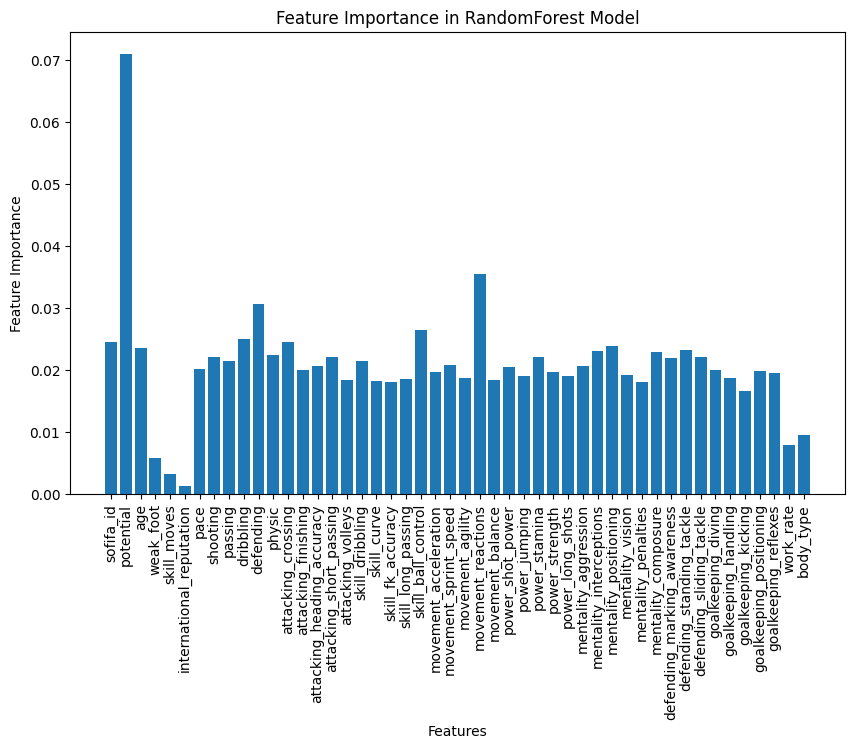

In [34]:
#Visualizing the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=clean_data.columns)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in RandomForest Model')
plt.xticks(rotation='vertical')
plt.show()


In [35]:
#Ranking the features based on the results above
feature_names = clean_data.columns # Replace with your feature names

# Sort feature importance in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking based on Random Forest Classifier:")
for f in range(len(feature_names)):
    print(f"{f + 1}. {feature_names[indices[f]]}: {feature_importances[indices[f]]}")

Feature ranking based on Random Forest Classifier:
1. potential: 0.07093121722213205
2. movement_reactions: 0.035522492212887315
3. defending: 0.03058733014948886
4. skill_ball_control: 0.026513513147545097
5. dribbling: 0.024926078929067806
6. sofifa_id: 0.024542193081192765
7. attacking_crossing: 0.024498497950316996
8. mentality_positioning: 0.023894481551060345
9. age: 0.02354719665012646
10. defending_standing_tackle: 0.02318855926985959
11. mentality_interceptions: 0.02301828331159353
12. mentality_composure: 0.022893820229180285
13. physic: 0.022441424662591865
14. power_stamina: 0.02205888432432519
15. attacking_short_passing: 0.022042404156008555
16. shooting: 0.022030735346144022
17. defending_sliding_tackle: 0.022030497238008873
18. defending_marking_awareness: 0.021984827889639864
19. skill_dribbling: 0.021448852597481576
20. passing: 0.021382812786492435
21. movement_sprint_speed: 0.02077200095194875
22. mentality_aggression: 0.020727716483825404
23. attacking_heading_accu

###Analysing feature importance based on correlation matrix with target variable 'overall'

In [36]:
correlation = clean_data.corrwith(y).abs()
sorted_correlation = correlation.sort_values(ascending=False)
sorted_correlation

movement_reactions             0.867234
mentality_composure            0.705252
passing                        0.678161
potential                      0.636366
dribbling                      0.609726
power_shot_power               0.558372
physic                         0.525042
mentality_vision               0.509087
attacking_short_passing        0.502191
skill_long_passing             0.487147
sofifa_id                      0.486575
shooting                       0.479750
age                            0.468197
skill_ball_control             0.449372
international_reputation       0.440987
skill_curve                    0.420495
attacking_crossing             0.410530
power_long_shots               0.407525
mentality_aggression           0.401920
skill_fk_accuracy              0.385617
power_stamina                  0.381869
skill_moves                    0.381369
skill_dribbling                0.378455
attacking_volleys              0.374330
power_strength                 0.358049


###Selecting top 35 features from correlation to create a subset of the data based on their relevance to the overal rating

In [37]:
N = 35
top_features = sorted_correlation.index[:N]
feature_subset = clean_data[top_features]
feature_subset

,movement_reactions,mentality_composure,passing,potential,dribbling,power_shot_power,physic,mentality_vision,attacking_short_passing,skill_long_passing,...,mentality_positioning,defending,mentality_penalties,attacking_heading_accuracy,attacking_finishing,defending_marking_awareness,mentality_interceptions,power_jumping,movement_agility,defending_standing_tackle
0,94.0,96.0,91.0,93.0,95.0,86.0,65.0,95.0,91.0,91.0,...,93.0,38.0,75.0,70.0,95.0,32.0,40.0,68.0,91.0,35.0
1,95.0,95.0,81.0,92.0,89.0,94.0,77.0,82.0,82.0,77.0,...,95.0,35.0,84.0,90.0,95.0,28.0,29.0,95.0,87.0,32.0
2,93.0,88.0,78.0,91.0,85.0,89.0,82.0,79.0,84.0,70.0,...,94.0,43.0,88.0,85.0,94.0,35.0,49.0,84.0,77.0,42.0
3,91.0,93.0,86.0,91.0,94.0,80.0,59.0,90.0,87.0,81.0,...,87.0,36.0,92.0,62.0,87.0,35.0,36.0,62.0,96.0,30.0
4,91.0,91.0,93.0,91.0,88.0,91.0,78.0,94.0,94.0,93.0,...,88.0,64.0,84.0,55.0,82.0,68.0,66.0,63.0,78.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,48.0,40.0,26.0,52.0,27.0,35.0,48.0,25.0,31.0,25.0,...,25.0,50.0,35.0,45.0,16.0,45.0,50.0,65.0,45.0,56.0
18940,50.0,35.0,49.0,53.0,47.0,38.0,48.0,53.0,55.0,50.0,...,32.0,43.0,35.0,42.0,30.0,43.0,42.0,53.0,50.0,42.0
18941,44.0,35.0,49.0,47.0,46.0,49.0,59.0,44.0,56.0,56.0,...,48.0,40.0,36.0,44.0,32.0,38.0,35.0,59.0,56.0,43.0
18942,53.0,45.0,40.0,67.0,53.0,50.0,40.0,49.0,45.0,37.0,...,43.0,16.0,50.0,36.0,47.0,18.0,11.0,50.0,67.0,11.0


#

###Selecting the best 10 features using PCA from the model created from the correlation matrix

In [38]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Perform feature selection to determine the best features (e.g., using SelectKBest with f_regression)
k_best = SelectKBest(score_func=f_regression, k=10)
best_features = k_best.fit_transform(feature_subset, y)

# Get the column names of the best features
best_feature_indices = k_best.get_support(indices=True)
best_feature_names = feature_subset.columns[best_feature_indices]

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit the PCA model to your data
pca.fit(best_features)

# Get the explained variance of each principal component
explained_variance = pca.explained_variance_ratio_

# Sort the feature names based on the explained variance (highest variance first)
sorted_feature_names = [name for _, name in sorted(zip(explained_variance, best_feature_names), reverse=True)]

# Select the top N feature names
top_n = 10
selected_feature_names = sorted_feature_names[:top_n]
newX = feature_subset[selected_feature_names]
newX

,movement_reactions,mentality_composure,passing,potential,dribbling,power_shot_power,physic,mentality_vision,attacking_short_passing,skill_long_passing
0,94.0,96.0,91.0,93.0,95.0,86.0,65.0,95.0,91.0,91.0
1,95.0,95.0,81.0,92.0,89.0,94.0,77.0,82.0,82.0,77.0
2,93.0,88.0,78.0,91.0,85.0,89.0,82.0,79.0,84.0,70.0
3,91.0,93.0,86.0,91.0,94.0,80.0,59.0,90.0,87.0,81.0
4,91.0,91.0,93.0,91.0,88.0,91.0,78.0,94.0,94.0,93.0
...,...,...,...,...,...,...,...,...,...,...
18939,48.0,40.0,26.0,52.0,27.0,35.0,48.0,25.0,31.0,25.0
18940,50.0,35.0,49.0,53.0,47.0,38.0,48.0,53.0,55.0,50.0
18941,44.0,35.0,49.0,47.0,46.0,49.0,59.0,44.0,56.0,56.0
18942,53.0,45.0,40.0,67.0,53.0,50.0,40.0,49.0,45.0,37.0


An "Explained Variance" of 100.00% in PCA means that all the variation present in the original data is accounted for by the selected principal components. Essentially, none of the data's variability remains unexplained, and you have retained all the important information in a more compact form through PCA.

In [39]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance.sum() * 100:.2f}%")

Explained Variance: 100.00%


### Standardising the independent variables and inputting the proper column names and formats

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
scaled_features=scaler.fit_transform(newX)

In [42]:
scaled_df = pd.DataFrame(scaled_features, columns=newX.columns)
X= scaled_df

In [43]:
X

,movement_reactions,mentality_composure,passing,potential,dribbling,power_shot_power,physic,mentality_vision,attacking_short_passing,skill_long_passing
0,3.554438,3.137573,3.325690,3.586563,3.267653,2.119026,0.063135,3.000047,2.216206,2.522017
1,3.664174,3.055051,2.374463,3.422893,2.686029,2.719163,1.339883,2.052781,1.598583,1.601260
2,3.444701,2.477402,2.089095,3.259222,2.298280,2.344077,1.871861,1.834181,1.735833,1.140882
3,3.225227,2.890009,2.850077,3.259222,3.170715,1.668922,-0.575239,2.635714,1.941707,1.864334
4,3.225227,2.724966,3.515936,3.259222,2.589091,2.494112,1.446278,2.927180,2.422080,2.653554
...,...,...,...,...,...,...,...,...,...,...
18939,-1.493455,-1.483625,-2.857288,-3.123941,-3.324083,-1.706851,-1.745590,-2.100615,-1.901280,-1.818694
18940,-1.273981,-1.896232,-0.669465,-2.960270,-1.385337,-1.481799,-1.745590,-0.060350,-0.254285,-0.174485
18941,-1.932402,-1.896232,-0.669465,-3.942295,-1.482275,-0.656610,-0.575239,-0.716150,-0.185661,0.220125
18942,-0.944771,-1.071018,-1.525570,-0.668878,-0.803714,-0.581593,-2.596755,-0.351817,-0.940533,-1.029474


# 3. Training and Testing the model

# Training the model with cross validation

In [44]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from xgboost import XGBRegressor

In [45]:
# Models
models = [
    ('Random Forest', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

# Initialize an ensemble model
ensemble_model = VotingRegressor(models)
# Define the number of folds for cross-validation
num_folds = 5

Random Forest:

    Cross-Validation Scores: Range from -2.15 to -4.65, reflecting model performance in different data subsets.
    Mean Score: Approximately -3.58, indicating the average prediction error across the folds.

XGBoost:

    Cross-Validation Scores: Range from -2.17 to -4.65, showing model consistency in different data subsets.
    Mean Score: Approximately -3.58, representing the overall performance and prediction accuracy.

Gradient Boosting:

    Cross-Validation Scores: Range from -2.18 to -4.63, showcasing model performance across various data subsets.
    Mean Score: Approximately -3.57, summarizing the average prediction error and consistency.

In [46]:
# Iterate through each model
for model_name, model in models:
    # Perform cross-validation
    scores = cross_val_score(ensemble_model, X, y, cv=num_folds)

    print(f"Model: {model_name}")
    print("Cross-Validation Scores:")
    print(scores)
    print(f"Mean Score: {scores.mean()}\n")

Model: Random Forest
Cross-Validation Scores:
[-2.15993985 -4.64249123 -4.54720072 -3.70259391 -2.84160788]
Mean Score: -3.5787667165826313

Model: XGBoost
Cross-Validation Scores:
[-2.16382459 -4.61395131 -4.52784275 -3.6672673  -2.84465016]
Mean Score: -3.563507223559651

Model: Gradient Boosting
Cross-Validation Scores:
[-2.14189737 -4.62684229 -4.5615587  -3.68205279 -2.85082292]
Mean Score: -3.5726348128187255



In [47]:
# Train the ensemble model on the entire dataset
ensemble_model.fit(X, y)

VotingRegressor(estimators=[('Random Forest', RandomForestRegressor()),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('Gradient Boosting', GradientBoostingRegressor())])

# 4. Evaluation

Random Forest:

    RMSE (Root Mean Squared Error): Measures the average magnitude of prediction errors. An RMSE of 4.33 indicates, on average, predictions are off by approximately 4.33 units.
    MAE (Mean Absolute Error): Represents the average absolute difference between predictions and actual values. An MAE of 3.71 signifies an average absolute prediction error of about 3.71 units.

XGBoost:

    RMSE: Indicates an average prediction error of 3.91 units, making it more accurate on average compared to Random Forest.
    MAE: Suggests that, on average, predictions deviate from actual values by approximately 3.31 units.

Gradient Boosting:

    RMSE: Represents an average error of approximately 4.12 units, making it less accurate than XGBoost but better than Random Forest.
    MAE: Suggests an average absolute prediction error of about 3.54 units, which falls between XGBoost and Random Forest in terms of accuracy.

In summary, lower values for both RMSE and MAE indicate more accurate model predictions. Among the three models, XGBoost generally performs the best, followed by Gradient Boosting, and Random Forest has the highest average prediction errors.

In [48]:
# Cross-validation and model evaluation (MAE and RMSE)
for name, model in models:
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error'))
    mae_scores = -cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
    print(f"{name} - Cross-Validation RMSE: {np.mean(rmse_scores):.2f} (±{np.std(rmse_scores):.2f})")
    print(f"{name} - Cross-Validation MAE: {np.mean(mae_scores):.2f} (±{np.std(mae_scores):.2f})")


Random Forest - Cross-Validation RMSE: 4.31 (±1.71)
Random Forest - Cross-Validation MAE: 3.72 (±1.49)
XGBoost - Cross-Validation RMSE: 3.91 (±1.59)
XGBoost - Cross-Validation MAE: 3.31 (±1.36)
Gradient Boosting - Cross-Validation RMSE: 4.12 (±1.71)
Gradient Boosting - Cross-Validation MAE: 3.54 (±1.55)


Entering the various hyperparameter to be tested for the model

In [49]:
#Models and their respective hyperparameter grids
models = {
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]
    })
}

Chosed grid search over randomised search since its more efficient and less memory intensive. Below the code chunk, there are best hyperparameter outputted from fine tuning

In [50]:
# Randomized search and model selection
best_models = {}
for name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    random_search.fit(X, y)
    best_models[name] = random_search.best_estimator_
    print(f"Best {name} Model Parameters: {random_search.best_params_}")

Best Random Forest Model Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 30}
Best XGBoost Model Parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
Best Gradient Boosting Model Parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2}


In [51]:
# Create an ensemble of the best-tuned models
ensemble_regressor = VotingRegressor(estimators=[
    ('Random Forest', best_models['Random Forest']),
    ('XGBoost', best_models['XGBoost']),
    ('Gradient Boosting', best_models['Gradient Boosting'])
])


In [52]:
# Fit the ensemble regressor to the data
ensemble_regressor.fit(X, y)

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(max_depth=30,
                                                   min_samples_leaf=4,
                                                   min_samples_split=5,
                                                   n_estimators=300)),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=No...
                                          learning_rate=0.2, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('Gradient Boosting',
                             GradientBoostingRegressor(learning_rate=0.2,
                                                       max_depth=4,
                                                       n_estimators=200))])

# 5. Testing with new data set

### Removing useless variables (Those with 30% missing values)



Dropped excatly the same columns as in the training dataset to ensure standadised data for comparism

In [53]:
#Loading the datasets to be used (both training and testing)
testing_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A 2023/players_22.csv')
data2= testing_data.copy()

In [54]:
testing_data = testing_data[['movement_reactions','overall', 'mentality_composure', 'passing', 'potential', 'dribbling','power_shot_power','physic','mentality_vision','attacking_short_passing', 'skill_long_passing']]
testing_data

,movement_reactions,overall,mentality_composure,passing,potential,dribbling,power_shot_power,physic,mentality_vision,attacking_short_passing,skill_long_passing
0,94,93,96,91.0,93,95.0,86,65.0,95,91,91
1,93,92,88,79.0,92,86.0,90,82.0,81,85,70
2,94,91,95,80.0,91,88.0,94,75.0,76,80,77
3,89,91,93,86.0,91,94.0,80,63.0,90,86,81
4,91,91,89,93.0,91,88.0,91,78.0,94,94,93
...,...,...,...,...,...,...,...,...,...,...,...
19234,53,47,37,46.0,52,48.0,46,49.0,43,50,48
19235,49,47,47,50.0,59,46.0,49,51.0,49,51,50
19236,46,47,36,45.0,55,49.0,50,52.0,46,49,49
19237,48,47,47,36.0,60,48.0,48,42.0,40,38,33


In [55]:
threshold = 0.30 *len(testing_data)

In [56]:
testing_data = testing_data.dropna(thresh=threshold, axis =1)

### Splitting numerical and categorical

In [57]:
Ytest = testing_data['overall']
testing_data.drop('overall', axis=1,inplace=True)

In [58]:
numerical_col = testing_data.select_dtypes(include=['int64', 'float64']).columns
categorical_col = testing_data.select_dtypes(include=['object']).columns

In [59]:
categorical_var_test = testing_data[categorical_col]
numerical_var_test = testing_data[numerical_col]

In [60]:
numerical_var_test

,movement_reactions,mentality_composure,passing,potential,dribbling,power_shot_power,physic,mentality_vision,attacking_short_passing,skill_long_passing
0,94,96,91.0,93,95.0,86,65.0,95,91,91
1,93,88,79.0,92,86.0,90,82.0,81,85,70
2,94,95,80.0,91,88.0,94,75.0,76,80,77
3,89,93,86.0,91,94.0,80,63.0,90,86,81
4,91,89,93.0,91,88.0,91,78.0,94,94,93
...,...,...,...,...,...,...,...,...,...,...
19234,53,37,46.0,52,48.0,46,49.0,43,50,48
19235,49,47,50.0,59,46.0,49,51.0,49,51,50
19236,46,36,45.0,55,49.0,50,52.0,46,49,49
19237,48,47,36.0,60,48.0,48,42.0,40,38,33


### KNN imputation of numerical variables

In [61]:
knn_imputer = KNNImputer(n_neighbors=8)
numerical_var_imputed_2 = knn_imputer.fit_transform(numerical_var_test)
numerical_columns = list(numerical_var_test.columns)
numerical_var_imputed_2 = pd.DataFrame(numerical_var_imputed_2, columns=numerical_col)

### Joining back the clean numerical and categorical datasets

In [62]:
Xtest = numerical_var_imputed_2
Xtest

,movement_reactions,mentality_composure,passing,potential,dribbling,power_shot_power,physic,mentality_vision,attacking_short_passing,skill_long_passing
0,94.0,96.0,91.0,93.0,95.0,86.0,65.0,95.0,91.0,91.0
1,93.0,88.0,79.0,92.0,86.0,90.0,82.0,81.0,85.0,70.0
2,94.0,95.0,80.0,91.0,88.0,94.0,75.0,76.0,80.0,77.0
3,89.0,93.0,86.0,91.0,94.0,80.0,63.0,90.0,86.0,81.0
4,91.0,89.0,93.0,91.0,88.0,91.0,78.0,94.0,94.0,93.0
...,...,...,...,...,...,...,...,...,...,...
19234,53.0,37.0,46.0,52.0,48.0,46.0,49.0,43.0,50.0,48.0
19235,49.0,47.0,50.0,59.0,46.0,49.0,51.0,49.0,51.0,50.0
19236,46.0,36.0,45.0,55.0,49.0,50.0,52.0,46.0,49.0,49.0
19237,48.0,47.0,36.0,60.0,48.0,48.0,42.0,40.0,38.0,33.0


Standardising the independent variables

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [64]:
scaled_features=scaler.fit_transform(Xtest)

In [65]:
columns_order = ['movement_reactions', 'mentality_composure', 'passing', 'potential', 'dribbling','power_shot_power','physic','mentality_vision','attacking_short_passing', 'skill_long_passing']

# 2. Create a new DataFrame with the extracted columns
newX = pd.DataFrame(scaled_features, columns=columns_order)

In [66]:
newX

,movement_reactions,mentality_composure,passing,potential,dribbling,power_shot_power,physic,mentality_vision,attacking_short_passing,skill_long_passing
0,3.599846,3.131025,2.997388,3.601780,3.063069,2.139433,0.091475,3.006228,2.217457,2.524112
1,3.489252,2.473077,2.004597,3.437470,2.263961,2.442649,1.871337,1.980597,1.803392,1.126551
2,3.599846,3.048782,2.087330,3.273160,2.441541,2.745866,1.138453,1.614300,1.458338,1.592404
3,3.046874,2.884295,2.583725,3.273160,2.974279,1.684607,-0.117921,2.639931,1.872403,1.858606
4,3.268063,2.555321,3.162854,3.273160,2.441541,2.518454,1.452546,2.932969,2.424490,2.657213
...,...,...,...,...,...,...,...,...,...,...
19234,-0.934526,-1.721343,-0.725578,-3.134932,-1.110051,-0.892735,-1.583691,-0.803260,-0.611986,-0.337561
19235,-1.376903,-0.898908,-0.394648,-1.984762,-1.287631,-0.665323,-1.374295,-0.363704,-0.542976,-0.204460
19236,-1.708687,-1.803587,-0.808311,-2.642002,-1.021262,-0.589519,-1.269597,-0.583482,-0.680997,-0.271010
19237,-1.487498,-0.898908,-1.552904,-1.820452,-1.110051,-0.741127,-2.316575,-1.023038,-1.440116,-1.335819


Evaluate model using player_22 test data

  **Mean Absolute Error (MAE)**
    An MAE of approximately 1.41 indicates that, on average, the model's predictions differ from actual values by about 1.41 units. Lower MAE values are generally better, and this value suggests that the model's predictions are reasonably close to the actual values.

  **Mean Squared Error (MSE)**
    The MSE of around 3.88 is a measure of the average squared prediction errors. Lower MSE values are better, and this value suggests that the model's predictions have relatively small squared differences from the actual values.

  **Root Mean Squared Error (RMSE)**
    An RMSE of roughly 1.97, which is the square root of the MSE, signifies the typical magnitude of prediction errors. Lower RMSE values are better, and this value suggests that, on average, the model's predictions are close to the actual values.

 ** R-squared (R2)**
    An R2 of approximately 0.92 indicates that the model accounts for about 92% of the variance in the data. Higher R2 values are better, and this value suggests that the model is explaining a significant portion of the data's variability.

In [67]:
from sklearn.metrics import r2_score
predictions = ensemble_regressor.predict(newX)
mae = mean_absolute_error(Ytest, predictions)
mse = mean_squared_error(Ytest, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Ytest, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.3969979368022376
Mean Squared Error (MSE): 3.799981700446895
Root Mean Squared Error (RMSE): 1.9493541752198071
R-squared (R2): 0.9197217353183227


# 6. Deployment

In [68]:

import joblib

# Saving the model
joblib.dump(ensemble_regressor, 'trained_model.pkl')


['trained_model.pkl']